# **Optimizing Marketing Strategies Using A/B Testing and Statistical Inference**

<p float="left">
  <img src="Classification of hypothesis test2.png" width="45%" />
  <img src="tests.jpg" width="45%" />

</p>


# 1. Business Understandning




---

### Goal  
- To evaluate how different marketing contact strategies influence customer subscription behavior (`outcome`), and to identify which strategies are most effective in driving conversions.

- The primary focus is to simulate a real-world marketing experiment by comparing a **control group** against various **treatment strategies**, and then rank those strategies based on performance.

---

###  Experimental Design

####  Group Definitions

- **Treatment Group:**  
  Rows where the `poutcome` column is either `"success"` or `"failure"` — these customers were previously contacted as part of a campaign. They represent the **exposed population**.

- **Control Group:**  
  Rows where `poutcome` is `null` interpreted as "not contacted" or "other." These users serve as a **baseline** to compare against treatment.

---

###  Key Business Questions

1. **Is the treatment group more effective than the control group?**  
   - This helps validate whether marketing contact in general improves conversion compared to doing nothing.

2. **Does the type of marketing strategy (`marketing_strategy`) impact the success rate?**  
   - Evaluates whether different contact methods (e.g., telephone, cellular, voice blast) result in **meaningfully different outcomes**.

3. **Which specific marketing strategy performs best?**  
   - Pinpoints the **highest-converting method**, guiding future marketing investments and optimization.

---

###  Why This Matters

This stage lays the foundation for the entire analysis:
- Helps simulate controlled experimentation in real business conditions.
- Links marketing actions to measurable customer behavior.
- Enables data-driven decisions on **which strategies to scale** and **which to cut**.


### About Data


* Dataset Overview
- **Name:** Bank Marketing Dataset  
- **Source:** UCI Machine Learning Repository  
- **Donated On:** February 13, 2012  
- **Provider:** Portuguese banking institution  
- **Objective:** Predict whether a client subscribes to a term deposit (target variable: `y`)  
- **Size:** 45,211 rows × 16 features  
- **Type:** Multivariate; includes both categorical and numeric variables  
- **License:** [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/) – free to use with attribution  
- **Reference Paper:**  
  Moro, S., Rita, P., & Cortez, P. (2014).  
  *A data-driven approach to predict the success of bank telemarketing*.  
  Published in *Decision Support Systems*.

---

* *Key Fields
- `age`, `job`, `education`, `default`, `balance`, `housing`, `loan` – client profile  
- `contact`, `duration`, `campaign`, `pdays`, `previous`, `poutcome` – interaction history  
- `y` – target variable (yes/no for term deposit subscription)

---

* Citation
> Moro, S., Rita, P., & Cortez, P. (2014). *Bank Marketing [Dataset]*. UCI Machine Learning Repository. [DOI: 10.24432/C5K306](https://doi.org/10.24432/C5K306)


# 2. Data Wrangling

### install and import modules

In [61]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import fisher_exact
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import beta
from scipy.stats import norm

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


### Wrangling

In [4]:

df = pd.read_csv('C:/Users/Patil Shinde/Desktop/bank_marketing.csv')



In [194]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,poutcome,contact,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,NaN,cellular,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,NaN,cellular,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,NaN,Cross selling,no
3,47,blue-collar,married,NaN,no,1506,yes,no,5,may,92,1,-1,0,NaN,cellular,no
4,33,NaN,single,NaN,no,1,no,no,5,may,198,1,-1,0,NaN,telephone,no


In [331]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day_of_week', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'contact', 'y'],
      dtype='object')

In [195]:
df['poutcome'].value_counts()

poutcome
failure    4901
other      1840
success    1511
Name: count, dtype: int64

In [196]:
df['pdays'].value_counts()

pdays
-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 769        1
 587        1
 778        1
 854        1
Name: count, Length: 559, dtype: int64

In [2]:
import pandas as pd

In [ ]:
df_sample_raw = df.sample(100)

import os
path = os.path.expanduser("~/Desktop/df_sample_raw.csv")
df_sample_raw.to_csv(path, index=False)


# 3. Pre Processing 

- Our goal is to find out whthere there is significnat difference between each baking marketing strattey or no 
- if there is difference then which  stratgey is most significnat one, 
- first prepare treat ment group vs control group 
- 'poutcome': in poutcome column, we have success (10%), failure(4%), other(4%) and null values(82%) (NaN), we shall delete IDs with other as it doesn't significny anything, 
- new 'group' columns: Ids with success and failure will become our control group and null values are our treatmnet group

In [6]:
df['group'] = df['poutcome'].apply(lambda x: 'control' if pd.isna(x) else 'treatment')


In [7]:
df['y'] = df['y'].map({'no': 0, 'yes': 1})

print(df['y'].dtype)  

print(df['y'].apply(type).unique())  



int64
[<class 'int'>]


In [8]:
df.rename(columns={'y': 'outcome', 'contact': 'marketing_strategy'}, inplace=True)

In [335]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,poutcome,marketing_strategy,outcome,group
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,NaN,cellular,0,control
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,NaN,cellular,0,control
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,NaN,Cross selling,0,control
3,47,blue-collar,married,NaN,no,1506,yes,no,5,may,92,1,-1,0,NaN,cellular,0,control
4,33,NaN,single,NaN,no,1,no,no,5,may,198,1,-1,0,NaN,telephone,0,control


In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day_of_week', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'marketing_strategy', 'outcome', 'group'],
      dtype='object')


Our goal is to identify the **best marketing campaign strategy** through an A/B test. For this, we only need the following columns:

- **Group assignment**:  
  Indicates whether the sample belongs to the **control** or **treatment** group (`group` column).

- **Type of marketing strategy**:  
  Represents the marketing channel used (`contact` column).

- **Outcome variable**:  
  Shows whether the campaign was successful. In our case, this is the `poutcome` column.


In [10]:
ab = df[['group', 'marketing_strategy', 'outcome']]


In [11]:
ab.head()

,group,marketing_strategy,outcome
0,control,cellular,0
1,control,cellular,0
2,control,Cross selling,0
3,control,cellular,0
4,control,telephone,0


In [338]:
ab['outcome'].value_counts()

outcome
0    40273
1     4938
Name: count, dtype: int64

In [12]:
df_sample_processed = ab.sample(100)

import os
path = os.path.expanduser("~/Desktop/df_sample_processed.csv")
df_sample_processed.to_csv(path, index=False)

# 4. EDA (Exploratory Data Analysis)

In [379]:
import seaborn as sns
import matplotlib.pyplot as plt

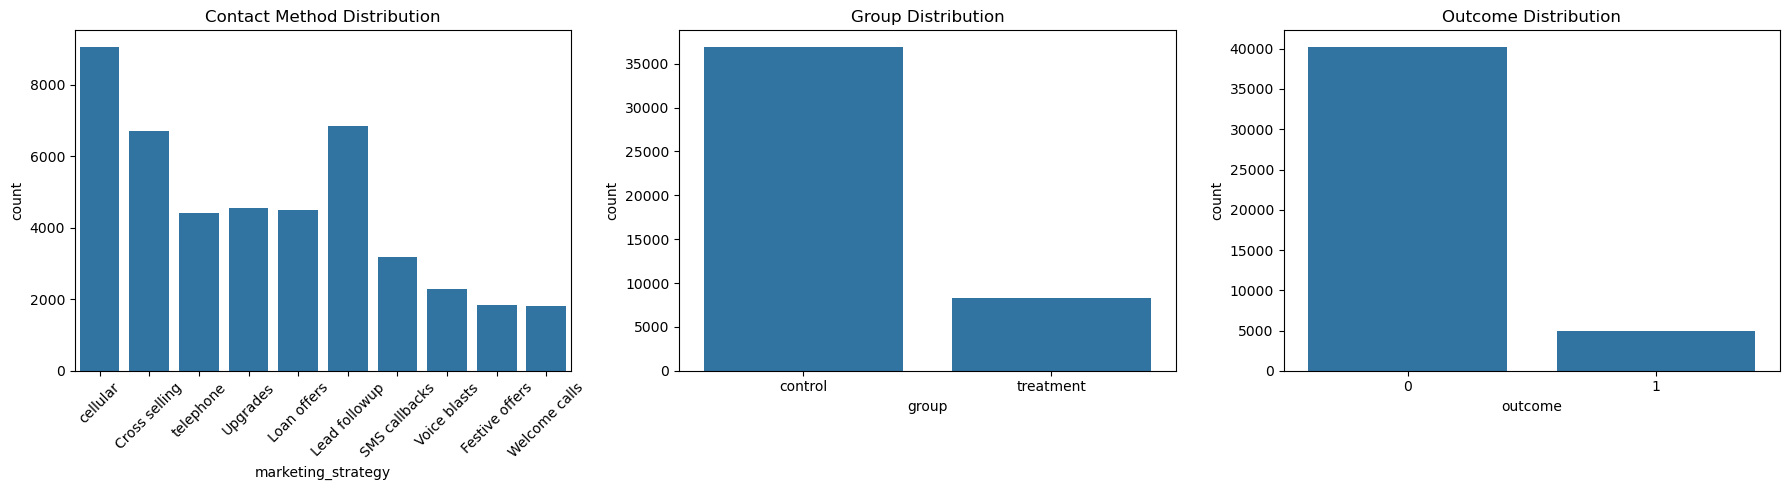

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=ab, x='marketing_strategy', ax=axes[0])
axes[0].set_title('Contact Method Distribution')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=ab, x='group', ax=axes[1])
axes[1].set_title('Group Distribution')

sns.countplot(data=ab, x='outcome', ax=axes[2])
axes[2].set_title('Outcome Distribution')

plt.tight_layout()
plt.show()

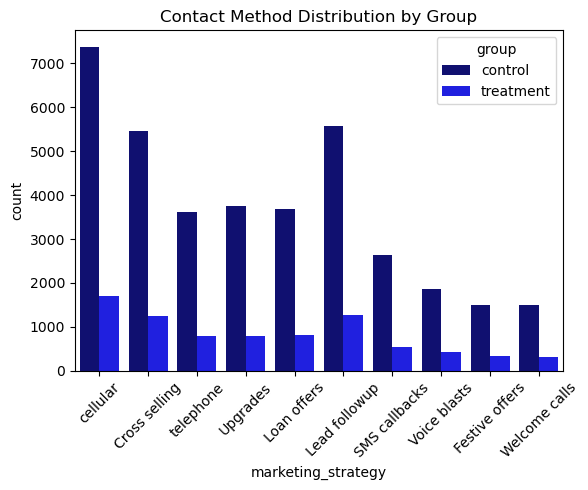

In [ ]:
palette = {'treatment': 'blue', 'control': 'navy'}


plt.figure(figsize=(6, 5))
sns.countplot(data=ab, x='marketing_strategy', hue='group', palette=palette)
plt.title('Contact Method Distribution by Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Patil Shinde\AppData\Local\Temp\ipykernel_10236\3556980446.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ab, x='group', palette=palette)


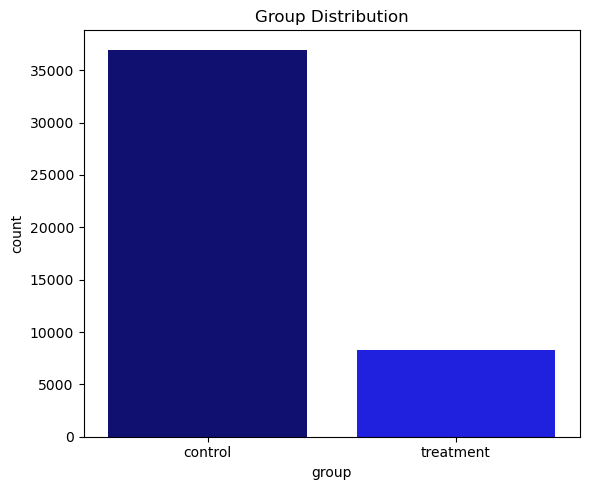

In [ ]:


plt.figure(figsize=(6, 5))
sns.countplot(data=ab, x='group', palette=palette)
plt.title('Group Distribution')
plt.tight_layout()
plt.show()


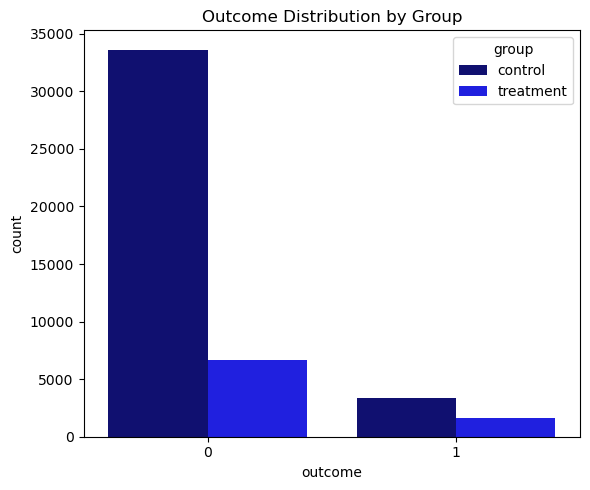

In [ ]:

plt.figure(figsize=(6, 5))
sns.countplot(data=ab, x='outcome', hue='group', palette=palette)
plt.title('Outcome Distribution by Group')
plt.tight_layout()
plt.show()

**Correlation**
* **Identify potential influencers of conversion**: Correlation plots help spot which features (treatment group, specific marketing strategies) are positively or negatively associated with the outcome before deeper analysis.

* **Guide feature selection and hypothesis testing**: Seeing early correlations can help prioritize which variables to include in models or tests  ANOVA, Bayesian, or pairwise comparisons.


In [ ]:

df_encoded = pd.get_dummies(ab, columns=['group', 'marketing_strategy'], drop_first=True)

correlation_matrix = df_encoded.corr()

correlation_with_outcome = correlation_matrix['outcome'].sort_values(ascending=False)
print(correlation_with_outcome)


outcome                              1.000000
group_treatment                      0.127900
marketing_strategy_Festive offers    0.034035
marketing_strategy_Welcome calls     0.027019
marketing_strategy_Voice blasts      0.020421
marketing_strategy_telephone         0.015910
marketing_strategy_SMS callbacks     0.014284
marketing_strategy_Upgrades          0.004908
marketing_strategy_Loan offers      -0.002415
marketing_strategy_Lead followup    -0.021058
marketing_strategy_cellular         -0.037724
Name: outcome, dtype: float64


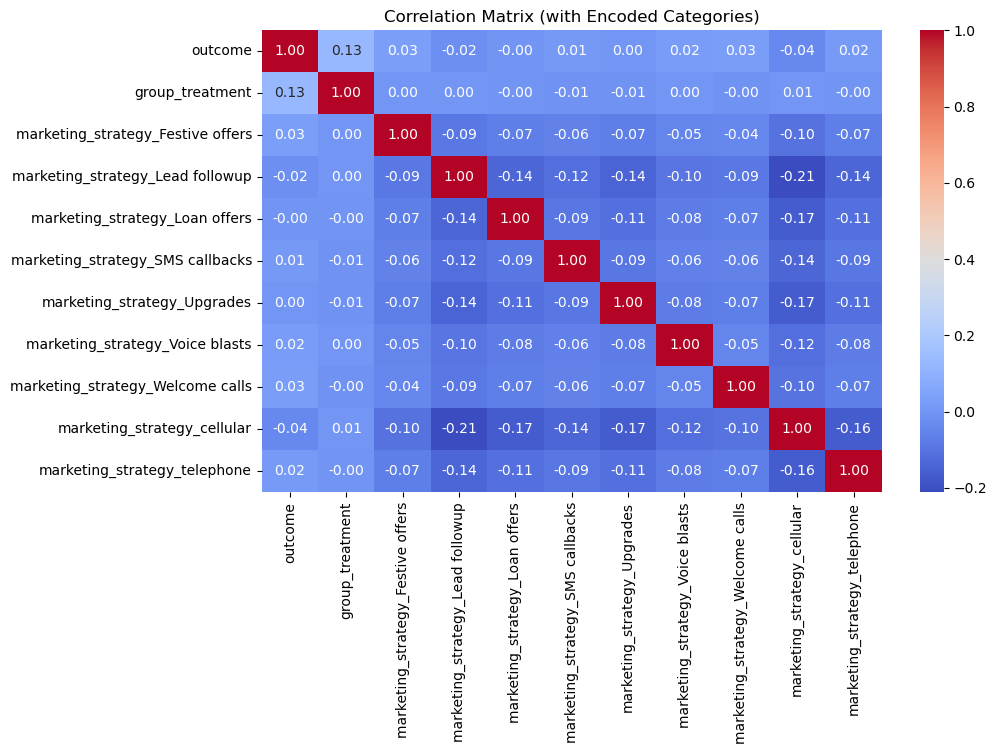

In [388]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (with Encoded Categories)')
plt.show()


* **Treatment shows positive impact**: Being in the treatment group correlates with higher conversions (r = 0.128).
* **Strategy signals**: Festive offers, Welcome calls, and Voice blasts show slight positive lift. Cellular and Lead followup show slight negative association.


In [207]:
ab['group'].value_counts()


group
control      36959
treatment     8252
Name: count, dtype: int64

In [208]:
ab.groupby('group')['outcome'].mean()


group
control      0.09037
treatment    0.19062
Name: outcome, dtype: float64

In [209]:
control = ab[ab['group'] == 'control']


# 5. Diganostic tests 

* **Validate assumptions**: Diagnostics ensure A/B test conditions like normality and equal variances are met.
* **Avoid misleading results**: They help choose the right test and improve result reliability.



---

- **Q-Q Plot**
- Visual tool to assess if residuals follow a normal distribution.
- Plots quantiles of residuals against theoretical normal quantiles.
- If points fall on the diagonal line, normality is likely satisfied.

---

- **Shapiro–Wilk Test**
- Formal test for normality of a distribution (typically residuals).
- Null hypothesis: data are normally distributed.
- p-value > 0.05 suggests no strong evidence against normality.

---

- **Levene’s Test**
- Assesses homogeneity of variances across groups.
- Null hypothesis: all groups have equal variances.
- Used before ANOVA or t-tests to validate equal variance assumption.

---

- **Residual Plots**
- Plots residuals vs. fitted values to check for patterns or bias.
- Helps detect non-linearity, heteroscedasticity, and outliers.
- Should show random scatter if assumptions hold.

---

### Normality Check(Shapiro-Wilk Test)


In [ ]:
from scipy.stats import shapiro

for name, group in treat_only.groupby('marketing_strategy'):
    stat, p = shapiro(group['outcome'])
    print(f"{name}: p = {p:.4f}")


Cross selling: p = 0.0000
Festive offers: p = 0.0000
Lead followup: p = 0.0000
Loan offers: p = 0.0000
SMS callbacks: p = 0.0000
Upgrades: p = 0.0000
Voice blasts: p = 0.0000
Welcome calls: p = 0.0000
cellular: p = 0.0000
telephone: p = 0.0000


**Results**
- **Result**: p = 0.0000 for all groups, strong evidence against normality.  
- **Conclusion**: Normality assumption is violated, which is expected since the outcome is binary (0 or 1), not continuous.


### Homogeneity of Variance (Levene's Test)

In [307]:
from scipy.stats import levene

grouped_data = [group['outcome'].values for name, group in treat_only.groupby('marketing_strategy')]
stat, p = levene(*grouped_data)
print(f"Levene's test p = {p:.4f}")


Levene's test p = 0.0000


**Homogeneity of Variance (Levene's Test)**
- **Result**: p = 0.0000, group variances are not equal.  
- **Conclusion**: Equal variance assumption is violated, outcome variability differs significantly across strategies.

### ANOVA Residulas Normality Check(Q-Q Plot)

c:\Users\Patil Shinde\.conda\envs\cls\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8252.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test p-value: 0.0000


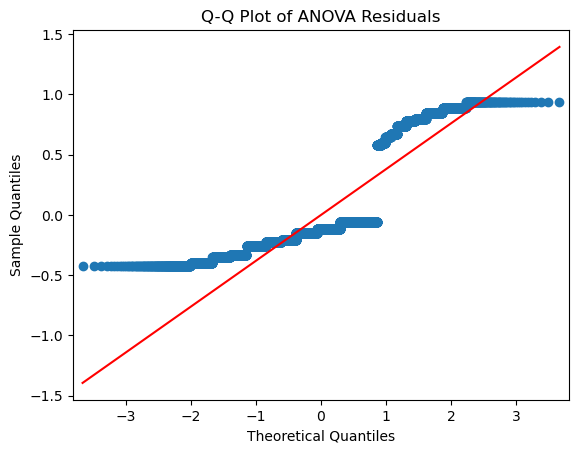

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt

model = ols('outcome ~ C(marketing_strategy)', data=treat_only).fit()

residuals = model.resid

shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test p-value: {shapiro_p:.4f}")

sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of ANOVA Residuals")
plt.show()

### Checking Normality Approximation Condition (Z-test norm)

In [ ]:
treat_only = ab[ab['group'] == 'treatment']

grouped_outcomes = {name: group['outcome'].values for name, group in treat_only.groupby('marketing_strategy')}

normal_approx_checks = []


In [ ]:
for a, b in combinations(grouped_outcomes.keys(), 2):
    group1 = grouped_outcomes[a]
    group2 = grouped_outcomes[b]

    n1 = len(group1)
    x1 = group1.sum()
    p1 = x1 / n1

    n2 = len(group2)
    x2 = group2.sum()
    p2 = x2 / n2

    cond_met = (
        (n1 * p1 >= 5) and
        (n1 * (1 - p1) >= 5) and
        (n2 * p2 >= 5) and
        (n2 * (1 - p2) >= 5)
    )

    normal_approx_checks.append({
        'method_1': a,
        'method_2': b,
        'n1*p1': round(n1 * p1, 2),
        'n1*(1-p1)': round(n1 * (1 - p1), 2),
        'n2*p2': round(n2 * p2, 2),
        'n2*(1-p2)': round(n2 * (1 - p2), 2),
        'condition_met': cond_met
    })



In [ ]:
normal_approx_df = pd.DataFrame(normal_approx_checks)

In [342]:

normal_approx_df[normal_approx_df['condition_met'] == False].head(20)


,method_1,method_2,n1*p1,n1*(1-p1),n2*p2,n2*(1-p2),condition_met


- Not even a single pair is voilating the normal apprx condition, we can apply z-test

# 6. a/b tests (Parametric), Assmuptions (Valid)

### 5A. a/b test (Chi-Square) - treatment vs control significance

**Chi-Square Test Assumptions – Status Check**

| **Assumption**                 | **Status**                                                                 |
|-------------------------------|-----------------------------------------------------------------------------|
| Independence of observations  |  Each row represents a unique user → assumption met                      |
| Categorical variables          |  `outcome` is binary; `marketing_strategy` is categorical → met         |
| Mutually exclusive groups     |  Each observation belongs to one group and one strategy → met            |
| Expected cell count ≥ 5       |  All contingency tables have expected counts > 5 → assumption met        |


- **Hypotheses & select test**

  - **Null hypothesis (H₀):**  
  Success rate in “treatment” \(p_t\) = Success rate in “control” \(p_c\) for a given contact method  

  - **Alternative hypothesis (H₁):**  
  Success rate in “treatment” \(p_t\) ≠ Success rate in “control” \(p_c\)  

  - **Test selection:**  
  We use Pearson’s χ² test on a 2×2 contingency table because both the row variable (group: treatment vs. control) and the column variable (outcome: success vs. failure) are categorical, and we want to compare proportions.



- **Build Contingency Table**  
   - Count successes & failures for treatment and control:  
     ```python
     table = [
       [treatment_success,  treatment_total - treatment_success],
       [control_success,    control_total   - control_success]
     ]
     ```  
   - This 2×2 table summarizes “success vs. failure” by “treatment vs. control.”

- **Perform Chi-Square Test**  
   - Call SciPy’s test:  
     ```python
     chi2, p, _, _ = chi2_contingency(table)
     ```  
   - `p` gives the probability of observing a difference at least as extreme under the null hypothesis (no difference).


In [223]:
from scipy.stats import chi2_contingency
import pandas as pd

results = []


In [302]:
ab.head()

,group,marketing_strategy,outcome
0,control,cellular,0
1,control,cellular,0
2,control,Cross selling,0
3,control,cellular,0
4,control,telephone,0


In [ ]:

for method in ab['marketing_strategy'].unique():
    treatment = ab[(ab['group'] == 'treatment') & (ab['marketing_strategy'] == method)]

    if treatment.empty:
        continue

    test_success = treatment['outcome'].sum()
    test_total = len(treatment)

    control_success = control['outcome'].sum()
    control_total = len(control)

    if test_total == 0 or control_total == 0:
        continue

    table = [
        [test_success, test_total - test_success],
        [control_success, control_total - control_success]
    ]

    chi2, p, _, _ = chi2_contingency(table)

    if p < 0.05:
        if test_success / test_total > control_success / control_total:
            status = "Better than control"
        elif test_success / test_total < control_success / control_total:
            status = "Worse than control"
        else:
            status = "Same as control"
    else:
        status = "No significant difference"

    results.append({
        'marketing_strategy': method,
        'treatment_success_rate': round(test_success / test_total, 4),
        'control_success_rate': round(control_success / control_total, 4),
        'p_value': round(p, 4),
        'result': status
    })



In [305]:
ab_summary = pd.DataFrame(results).sort_values('p_value')


In [226]:
ab_summary.head(15)

,marketing_strategy,treatment_success_rate,control_success_rate,p_value,result
1,Cross selling,0.1505,0.0904,0.0000,Better than control
2,telephone,0.2563,0.0904,0.0000,Better than control
3,Upgrades,0.2327,0.0904,0.0000,Better than control
4,Loan offers,0.1906,0.0904,0.0000,Better than control
7,Voice blasts,0.3588,0.0904,0.0000,Better than control
6,SMS callbacks,0.3066,0.0904,0.0000,Better than control
9,Welcome calls,0.4416,0.0904,0.0000,Better than control
8,Festive offers,0.4162,0.0904,0.0000,Better than control
0,cellular,0.0638,0.0904,0.0002,Worse than control
5,Lead followup,0.0998,0.0904,0.2722,No significant difference


- **Statistical Significance**: For 9 out of 10 marketing strategies, the p-values are effectively zero (p < 0.001), so we strongly reject H₀ and conclude the treatment success rate differs from control for those methods. Only “Lead followup” fails to reach significance (p = 0.2722), so we cannot reject H₀ there. 

- **Direction of Effect**: Seven strategies Cross selling (0.1505 vs. 0.0904), telephone (0.2563 vs. 0.0904), Upgrades, Loan offers, SMS callbacks, Voice blasts, Festive offers, and Welcome calls—all show substantially higher treatment success rates (Δ up to ≈ 0.35) compared to control, indicating a positive lift.  

- **Negative Lift for “cellular”**: Despite being highly significant (p = 0.0002), the “cellular” treatment group underperforms the control (0.0638 vs. 0.0904), demonstrating that this contact method actually reduces success rate under treatment.  

- **Magnitude & Practical Significance**: The absolute differences in proportions (treatment vs control) range from -0.0266 (“cellular”) to +0.3512 (“Welcome calls”). Such effect sizes, combined with χ² tests on 2 × 2 tables (df = 1), underline both statistical and practical relevance of choosing the right contact strategy.  


### 5B. a/b test (bayesian) - marketing strategies effectiveness

* **Model Each Strategy with Beta-Binomial**: For binary outcomes (0/1), assign a Beta(1,1) prior to each `marketing_strategy`, then update with observed successes and failures to get posteriors: `Beta(1 + success, 1 + failures)`.

* **Simulate Posteriors**: Draw thousands of samples from each strategy’s posterior distribution using `rvs()`, creating a Monte Carlo estimate of their underlying success probabilities.

* **Estimate P(best)**: For each simulation, identify which strategy had the highest sampled rate, then compute how often each strategy “wins”, giving a direct estimate of `P(strategy is best)` rather than just testing for any difference.



- **H₀ (Null Hypothesis):**  
  All marketing strategies have the same true conversion rate.  
  Any observed differences in performance are due to random variation.
- **H₁ (Alternative Hypothesis):**  
  At least one marketing strategy has a different (typically higher) true conversion rate.  
  Bayesian analysis estimates the probability that each strategy is the best, i.e.,  
  **P(strategy A > strategy B)** or **P(strategy = best)** across all.


In [297]:
treat_only = ab[ab['group'] == 'treatment']
grouped = treat_only.groupby('marketing_strategy')['outcome']


In [ ]:
from scipy.stats import beta

posterior_distributions = {}

for name, group in grouped:
    successes = group.sum()
    total = group.count()
    posterior = beta(1 + successes, 1 + total - successes)
    posterior_distributions[name] = posterior


In [ ]:
import numpy as np

samples = 10000
draws = {k: v.rvs(samples) for k, v in posterior_distributions.items()}

In [ ]:
strategies = list(draws.keys())
draw_matrix = np.array([draws[k] for k in strategies])

best_counts = (draw_matrix == draw_matrix.max(axis=0)).sum(axis=1)
prob_best = best_counts / samples


In [ ]:
for i, strategy in enumerate(strategies):
    print(f"{strategy}: P(best) ≈ {prob_best[i]:.3f}")

Cross selling: P(best) ≈ 0.000
Festive offers: P(best) ≈ 0.253
Lead followup: P(best) ≈ 0.000
Loan offers: P(best) ≈ 0.000
SMS callbacks: P(best) ≈ 0.000
Upgrades: P(best) ≈ 0.000
Voice blasts: P(best) ≈ 0.003
Welcome calls: P(best) ≈ 0.744
cellular: P(best) ≈ 0.000
telephone: P(best) ≈ 0.000


- **Welcome Calls dominates**: With a posterior probability of **P(best) ≈ 0.744**, it is by far the most likely to be the top-performing marketing strategy.

- **Festive Offers is the only real competitor**: It holds **P(best) ≈ 0.253**, making it the only other strategy with a meaningful chance of being best.

- **All others are statistically unlikely**: Every other strategy has **P(best) ≈ 0.000–0.003**, suggesting they are highly unlikely to outperform the top two.


### 5C.a/b test (pair wise Z-test) - best marketing strategy

**Assumptions Check**
| Assumption                         | Description (One-Liner)                                                         | Status        |
|-----------------------------------|---------------------------------------------------------------------------------|---------------|
| Independence of observations       | Each individual appears in only one group; no linked data                       | Valid         |
| Binary outcome                     | Response must be a 0/1 (success/failure) variable                               | Valid         |
| Large sample size (normal approx.) | Within each group, *n·p* and *n·(1 − p)* should both be ≥ 5                     | Valid (Chcked)   |
| Independent groups                 | Control and treatment groups have no overlapping members                        | Valid         |


There is a statistically significant difference in **conversion rates** across most marketing strategies within the treatment group, as shown by pairwise **Z-tests for proportions**.

* **Pairwise (Z-Test for Proportions)**  
For any two strategies _i_ and _j_ (with binary outcomes):  
- **H₀:** \( p_i = p_j \) (the true success rates of strategies _i_ and _j_ are equal)  
- **H₁:** \( p_i \ne p_j \) (the true success rates of strategies _i_ and _j_ are different)

---

- **Strong Evidence of True Differences**  
  Nearly every pairwise Z-test returned **p-values ≪ 0.05**, leading to rejection of H₀. This indicates real, statistically significant differences in conversion performance between most strategy pairs.

- **Exceptions Exist**  
  A few comparisons, such as "Festive offers" vs. "Voice blasts" (p ≈ 0.15), showed **no significant difference**, suggesting these strategies perform similarly.

- **Clear Standouts by Success Rate**  
  Methods like **Welcome calls (0.4227)** and **Festive offers (0.4017)** consistently outperform others in both statistical significance and practical conversion lift.



* **Z-test (Pair Wise)**

In [343]:
from scipy.stats import norm



In [ ]:
treat_only = ab[ab['group'] == 'treatment']

grouped_outcomes = {name: group['outcome'].values for name, group in treat_only.groupby('marketing_strategy')}

pairwise_z_results = []

In [ ]:


for a, b in combinations(grouped_outcomes.keys(), 2):
    x1 = grouped_outcomes[a].sum()
    n1 = len(grouped_outcomes[a])
    p1 = x1 / n1

    x2 = grouped_outcomes[b].sum()
    n2 = len(grouped_outcomes[b])
    p2 = x2 / n2

    p_pool = (x1 + x2) / (n1 + n2)
    se = (p_pool * (1 - p_pool) * (1/n1 + 1/n2))**0.5

    if se == 0:
        z = 0
        p_val = 1.0
    else:
        z = (p1 - p2) / se
        p_val = 2 * (1 - norm.cdf(abs(z)))  # two-tailed test

    pairwise_z_results.append({
        'method_1': a,
        'method_2': b,
        'mean_1': round(p1, 4),
        'mean_2': round(p2, 4),
        'p_value': round(p_val, 4)
    })


In [ ]:
pairwise_z_df = pd.DataFrame(pairwise_z_results).sort_values('p_value')

In [348]:
pairwise_z_df.head(50)

,method_1,method_2,mean_1,mean_2,p_value
0,Cross selling,Festive offers,0.1505,0.4017,0.0000
3,Cross selling,SMS callbacks,0.1505,0.3303,0.0000
5,Cross selling,Voice blasts,0.1505,0.3519,0.0000
4,Cross selling,Upgrades,0.1505,0.2226,0.0000
6,Cross selling,Welcome calls,0.1505,0.4227,0.0000
7,Cross selling,cellular,0.1505,0.0621,0.0000
9,Festive offers,Lead followup,0.4017,0.1163,0.0000
8,Cross selling,telephone,0.1505,0.2614,0.0000
15,Festive offers,cellular,0.4017,0.0621,0.0000
12,Festive offers,Upgrades,0.4017,0.2226,0.0000


- **Strong statistical separation**: Most pairwise Z-tests yield p-values < 0.001, indicating significant differences in success rates across strategies.  
- **Welcome calls leads**: It consistently outperforms others in both mean conversion and statistical comparison, making it the top-performing strategy.  
- **Low performers identified**: Strategies like **cellular** and **telephone** show much lower success rates, with almost no probability of being the best.


# 7. a/b tests (Non - Parametric), Assmuptions (NA)


---

#### 1. **Control vs. Treatment Outcome Comparison**  
**Test:** **Fisher’s Exact Test**  
- **Why:** Suitable for 2×2 contingency tables with binary outcomes and small sample sizes.  
- **Use Case:** Tests if the **proportion of success (outcome = 1)** is significantly different between `group == control` and `group == treatment`.  

---


**Hypotheses – Fisher's Exact Test**

- **H₀ (Null Hypothesis):** Conversion rates are the same in treatment and control groups.  
- **H₁ (Alternative Hypothesis):** Conversion rates differ between treatment and control groups.


In [361]:
ab.head()

,group,marketing_strategy,outcome
0,control,cellular,0
1,control,cellular,0
2,control,Cross selling,0
3,control,cellular,0
4,control,telephone,0


In [362]:
from scipy.stats import fisher_exact

In [ ]:
contingency = pd.crosstab(ab['group'], ab['outcome'])

treatment_success = contingency.loc['treatment', 1]
treatment_fail = contingency.loc['treatment', 0]
control_success = contingency.loc['control', 1]
control_fail = contingency.loc['control', 0]

table = [[treatment_success, treatment_fail],
         [control_success, control_fail]]

In [ ]:
odds_ratio, p_value = fisher_exact(table, alternative='two-sided')

print("Fisher's Exact Test Results")
print(f"Contingency Table: {table}")
print(f"Odds Ratio: {odds_ratio:.4f}")
print(f"P-Value: {p_value:.4f}")

Fisher's Exact Test Results
Contingency Table: [[np.int64(1598), np.int64(6654)], [np.int64(3340), np.int64(33619)]]
Odds Ratio: 2.4173
P-Value: 0.0000


- **Significant difference**: p-value = 0.0000, reject null hypothesis.  
- **Treatment effective**: odds ratio = 2.42,treatment group converts more.  
- **Conclusion**: Marketing Strategy increases likelihood of conversion.


#### 2. **Comparing Outcome Across Multiple Marketing Strategies (Within Treatment)** 



---
### Hypotheses – Kruskal–Wallis H-Test

- **H₀ (Null Hypothesis):** All marketing strategies have the same distribution of conversion outcomes.  
- **H₁ (Alternative Hypothesis):** At least one marketing strategy has a different distribution of conversion outcomes.
---
**Test:** **Kruskal–Wallis Test**  
- **Why:** Non-parametric alternative to one-way ANOVA for comparing **3 or more groups** with ordinal or non-normal data.  
- **Use Case:** Tests if the **distribution of outcome** differs across all `marketing_strategy` values **within the treatment group**.  
- **Note:** Can be applied even when `outcome` is binary, interpreted in terms of ranks.

---


In [366]:
from scipy.stats import kruskal


In [ ]:
treat_only = ab[ab['group'] == 'treatment']

In [ ]:
grouped = [group['outcome'].values for name, group in treat_only.groupby('marketing_strategy')]

In [ ]:
stat, p_value = kruskal(*grouped)

In [370]:
print("Kruskal–Wallis H-Test Results")
print(f"H-statistic: {stat:.4f}")
print(f"P-Value: {p_value:.4f}")

Kruskal–Wallis H-Test Results
H-statistic: 616.9131
P-Value: 0.0000


- **Statistically significant**: p-value = 0.0000, reject the null hypothesis.  
- **Variation exists**: At least one marketing strategy differs in conversion rate.  
- **Next step**: Perform pairwise comparisons to identify which strategies differ.


#### 3. **Best Marketing Strategy – Pairwise Comparisons**  

**Hypotheses**

- **H₀ (Null Hypothesis):** The distribution of conversion outcomes is the same for both marketing strategies being compared.  
- **H₁ (Alternative Hypothesis):** One marketing strategy has a statistically significantly higher distribution of conversion outcomes than the other.


**Test:** **Mann–Whitney U Test (Wilcoxon rank-sum)**  
- **Why:** Non-parametric alternative to independent t-test; compares medians/ranks between two strategies.  
- **Use Case:** Conduct **pairwise comparisons** between marketing strategies (within treatment group) to find significant differences and identify the most effective one.

---

In [371]:
from scipy.stats import mannwhitneyu

In [ ]:
treat_only = ab[ab['group'] == 'treatment']

grouped = treat_only.groupby('marketing_strategy')['outcome'].apply(list)


In [ ]:
win_counts = {strategy: 0 for strategy in grouped.index}

results = []

In [ ]:
for a, b in combinations(grouped.index, 2):
    outcomes_a = grouped[a]
    outcomes_b = grouped[b]

    stat_ab, p_ab = mannwhitneyu(outcomes_a, outcomes_b, alternative='greater')
    if p_ab < 0.05:
        win_counts[a] += 1

    stat_ba, p_ba = mannwhitneyu(outcomes_b, outcomes_a, alternative='greater')
    if p_ba < 0.05:
        win_counts[b] += 1


In [ ]:
win_df = pd.DataFrame(win_counts.items(), columns=['marketing_strategy', 'wins'])
win_df = win_df.sort_values('wins', ascending=False)

In [377]:
print("Best strategies by number of statistically significant wins:")
print(win_df)

Best strategies by number of statistically significant wins:
  marketing_strategy  wins
7      Welcome calls     8
1     Festive offers     7
6       Voice blasts     6
4      SMS callbacks     6
9          telephone     5
3        Loan offers     3
5           Upgrades     3
0      Cross selling     2
2      Lead followup     1
8           cellular     0


- **Welcome calls is the top performer**, winning 8 out of all pairwise comparisons with statistically significant better outcomes.  
- **Festive offers** and **Voice blasts** also showed strong performance, ranking just behind the leader.  
- **Cellular** had 0 wins, indicating the weakest relative performance across all strategies.


# 8. a/b tests (Parametric), Assmuptions (Partially Valid)

### Rationale 

* **Tests are often robust** : Many tests like ANOVA still work well even if assumptions are mildly violated.
* **Decisions > Perfection** : In practice, we can't wait for ideal conditions; insights must drive action.
* **Use backups wisely** : Visual checks, non-parametric tests, or bootstrapping help when assumptions are shaky.
* **Focus on value** : The goal is meaningful, actionable results, not statistical perfection.

## a/b test (one-way ANOVA) - marketing strategies effectiveness

**Applying ANOVA Despite Assumption Violations**

* While both **normality** and **equal variance** assumptions are violated, applying One-Way ANOVA on a large sample binary outcome can still yield **reasonable and interpretable results** due to the Central Limit Theorem.  

* However, results should be interpreted **with caution**, especially p-values and ideally validated using more appropriate methods like **chi-square tests** or **logistic regression**, which are designed for binary data.


**Overall (One‐Way Comparison)**  
- **H₀:** All treatment groups (by marketing strategy) have the same mean conversion rate  
- **H₁:** At least one treatment group’s mean conversion rate differs from the others  

- **Goal**: Determine if treatment success rates vary by marketing strategy.  
- **Method**: One‐way ANOVA splits total variance into between‐strategy vs. within‐strategy components, producing an F‐statistic and p‐value via `f_oneway()`.  
- **Result**: F = 79.55, p ≪ 0.001 → reject H₀; at least one strategy’s mean differs significantly.
- **Practical Implication**: Since at least one marketing strategy’s success rate differs from the others, you should proceed to post-hoc comparisons (e.g., Tukey HSD) to pinpoint which specific pairs of strategies drive this effect.    
- **Next Step**: Conduct post‐hoc tests (e.g. Tukey HSD) to identify which strategy pairs diverge.  

In [296]:
ab.head()

,group,marketing_strategy,outcome
0,control,cellular,0
1,control,cellular,0
2,control,Cross selling,0
3,control,cellular,0
4,control,telephone,0


In [228]:
treat_only = ab[ab['group'] == 'treatment']


In [229]:
treat_only.groupby('marketing_strategy')['outcome'].mean()

marketing_strategy
Cross selling     0.150520
Festive offers    0.416185
Lead followup     0.099764
Loan offers       0.190594
SMS callbacks     0.306569
Upgrades          0.232704
Voice blasts      0.358796
Welcome calls     0.441640
cellular          0.063830
telephone         0.256313
Name: outcome, dtype: float64

In [231]:
from scipy.stats import f_oneway

grouped = [group['outcome'].values for name, group in treat_only.groupby('marketing_strategy')]

f_stat, p_value = f_oneway(*grouped)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")


F-statistic: 79.5517, p-value: 0.0000



- **Welcome calls** dominates with a 74.4% probability of being the best-performing marketing strategy.  
- **Festive offers** is the only viable alternative, with a 25.3% chance of being the top strategy.  
- All other strategies have near-zero probability, making them statistically unlikely to outperform the top two.
---

## a/b test (pairwise t-test) - best marketing strategy

| Assumption                   | Description (One-Liner)                                              | Status      |
|------------------------------|-----------------------------------------------------------------------|-------------|
| Independence of observations| No repeated or linked data within or across groups                   | Valid       |
| Normality of distribution    | Outcome in each group should be approximately normal                 | Violated  |
| Equal variances              | Group variances should be similar (only if using Student’s t-test)   | Valid (using Welch's) |
| Continuous outcome           | Outcome should be continuous, not binary                             | Violated    |


**Hypotheses for Pairwise t-Tests (Mean Comparison)**

- **H₀ (Null Hypothesis):**  
  The mean success rates of marketing strategy _i_ and strategy _j_ are equal.  

- **H₁ (Alternative Hypothesis):**  
  The mean success rates of marketing strategy _i_ and strategy _j_ are not equal.  

→ If p-value < 0.05, we reject H₀ and conclude there's a statistically significant difference in performance between the two strategies.


- **Purpose:** Compare average success rates between each pair of marketing strategies within the treatment group using Welch’s t-test, which allows for unequal variances.

- **Method:** For every unique strategy pair, compute means and run `ttest_ind(..., equal_var=False)` to get a p-value indicating if the difference is statistically significant.

- **Insight:** Strategy pairs with p-values < 0.05 suggest meaningful performance differences, guiding which strategies outperform others.


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind


In [ ]:
treat_only = ab[ab['group'] == 'treatment']

grouped_outcomes = {name: group['outcome'].values for name, group in treat_only.groupby('marketing_strategy')}

pairwise_ttest_results = []

In [ ]:


for a, b in combinations(grouped_outcomes.keys(), 2):
    outcomes_a = grouped_outcomes[a]
    outcomes_b = grouped_outcomes[b]

    t_stat, p_val = ttest_ind(outcomes_a, outcomes_b, equal_var=False)

    pairwise_ttest_results.append({
        'method_1': a,
        'method_2': b,
        'mean_1': round(outcomes_a.mean(), 4),
        'mean_2': round(outcomes_b.mean(), 4),
        'p_value': round(p_val, 4)
    })



In [ ]:
pairwise_ttest_df = pd.DataFrame(pairwise_ttest_results).sort_values('p_value')


In [359]:
pairwise_ttest_df.head(50)

,method_1,method_2,mean_1,mean_2,p_value
0,Cross selling,Festive offers,0.1505,0.4017,0.0000
3,Cross selling,SMS callbacks,0.1505,0.3303,0.0000
6,Cross selling,Welcome calls,0.1505,0.4227,0.0000
5,Cross selling,Voice blasts,0.1505,0.3519,0.0000
7,Cross selling,cellular,0.1505,0.0621,0.0000
10,Festive offers,Loan offers,0.4017,0.2067,0.0000
9,Festive offers,Lead followup,0.4017,0.1163,0.0000
8,Cross selling,telephone,0.1505,0.2614,0.0000
15,Festive offers,cellular,0.4017,0.0621,0.0000
12,Festive offers,Upgrades,0.4017,0.2226,0.0000


- **Strong Evidence of Differences:** Most p-values are extremely low (p < 0.001), indicating clear, statistically significant differences in success rates between many strategy pairs.

- **Top Performers Stand Out:** Strategies like *Welcome calls* and *Festive offers* consistently outperform others across multiple comparisons, making them strong candidates for optimization focus.


## a/b test (Turkey's HSD) - best marketing strategy

- **Global Null (H₀):** All marketing strategies in the treatment group have the same mean conversion rate—any observed differences are due to chance.  
- **Global Alternative (H₁):** At least one strategy’s mean conversion rate differs from the others, indicating a real performance gap.  
- **Pairwise Null (Tukey HSD):** For any two strategies _i_ and _j_, their average success rates are equal (μᵢ = μⱼ).  
- **Pairwise Alternative (Tukey HSD):** For strategies _i_ vs. _j_, the true means are different


**Assumptions Check – Tukey's HSD Test**

| Assumption                         | Description (One-Liner)                                                         | Status        |
|-----------------------------------|---------------------------------------------------------------------------------|---------------|
| Independence of observations       | Each data point is independent; no repeated measures or dependencies            | Valid         |
| Normality of residuals             | Residuals from ANOVA model are approximately normally distributed               | Not Valid |
| Homogeneity of variances           | Variance across all groups should be approximately equal                        | Valid (Partially) |
| Equal sample sizes (ideal)         | Performs best when group sizes are equal or nearly equal                        | Approx. valid |
| Prior significant ANOVA            | Tukey's HSD should follow a significant one-way ANOVA result                    | Valid         |



---


1. **Filtered for Treatment Group**
   Restricted analysis to `group == 'treatment'` to isolate effectiveness between contact methods without control group influence.

2. **Defined Grouping and Outcome Variables**
   Used `contact` as the categorical factor and binary `outcome` as the dependent variable to compare mean success rates across methods.

3. **Applied Tukey's HSD for Multiple Comparisons**
   Ran Tukey’s HSD to test **all pairwise differences** while controlling the **family-wise error rate (FWER)** , critical for 45 comparisons (10C2).

4. **Converted and Sorted Results**
   Parsed Tukey’s summary into a DataFrame and sorted by `p-adj` to prioritize the most statistically meaningful differences.

5. **Interpreted Statistical Significance via `reject` Flag**
   Used `reject == True` to identify contact pairs with **significant differences in treatment success rates**, adjusted for multiple testing.


- Normality of residuals condition is not valid in this case.

In [126]:
%pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --------- ------------------------------ 2.4/9.8 MB 11.2 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/9.8 MB 11.6 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.8 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 10.8 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   --------

In [241]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
treatment_df = ab[ab['group'] == 'treatment'][['marketing_strategy', 'outcome']]

In [ ]:
tukey_result = pairwise_tukeyhsd(endog=treatment_df['outcome'],
                                 groups=treatment_df['marketing_strategy'],
                                 alpha=0.05)


In [ ]:
tukey_df = pd.DataFrame(data=tukey_result.summary().data[1:], columns=tukey_result.summary().data[0])
tukey_df.sort_values('p-adj', inplace=True)


In [ ]:
tukey_df.sort_values('meandiff',ascending = False).head(15)


,group1,group2,meandiff,p-adj,lower,upper,reject
21,Lead followup,Welcome calls,0.3419,0.0,0.2670,0.4167,True
6,Cross selling,Welcome calls,0.2911,0.0,0.2161,0.3661,True
0,Cross selling,Festive offers,0.2657,0.0,0.1932,0.3381,True
20,Lead followup,Voice blasts,0.2590,0.0,0.1926,0.3254,True
27,Loan offers,Welcome calls,0.2510,0.0,0.1720,0.3301,True
36,Upgrades,Welcome calls,0.2089,0.0,0.1297,0.2882,True
5,Cross selling,Voice blasts,0.2083,0.0,0.1417,0.2748,True
18,Lead followup,SMS callbacks,0.2068,0.0,0.1459,0.2677,True
44,cellular,telephone,0.1925,0.0,0.1411,0.2438,True
26,Loan offers,Voice blasts,0.1682,0.0,0.0971,0.2393,True


- **Mean Difference (`meandiff`)**: Shows how much the average conversion rate of `group1` exceeds that of `group2`.  
  - E.g. “Cross selling vs. Festive offers” has meandiff = 0.2657, meaning Festive offers outperforms Cross selling by ~26.6 percentage points.

- **Adjusted p-Value (`p-adj`) & `reject` Flag**:  
  - `p-adj = 0.0` (i.e. < 0.001) and `reject = True` indicate the difference is statistically significant after controlling for multiple comparisons.  
  - If `reject = False`, we’d conclude no reliable difference for that pair.

- **Confidence Interval (`lower`, `upper`)**:  
  - The 95 % CI for the mean difference; if it does **not** include 0, the difference is significant.  
  - E.g. for “Cross selling vs. cellular”, CI is [–0.1312, –0.0422], entirely below zero, confirming cellular beats Cross selling.

- **Direction & Magnitude**:  
  - Positive `meandiff` means `group1` > `group2`; negative means `group2` > `group1`.  
  - Larger absolute values indicate bigger practical lift.

- **Top Performers**:  
  - Pairs with the largest positive differences (e.g., “Lead followup vs. Welcome calls”: 0.3419) highlight which strategies yield the biggest gains over others.

- **Actionable Insight**:  
  - Any pair with `reject = True` and a large positive `meandiff` marks one strategy as clearly superior to the other, guiding choice of the best marketing approach.  


In [248]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

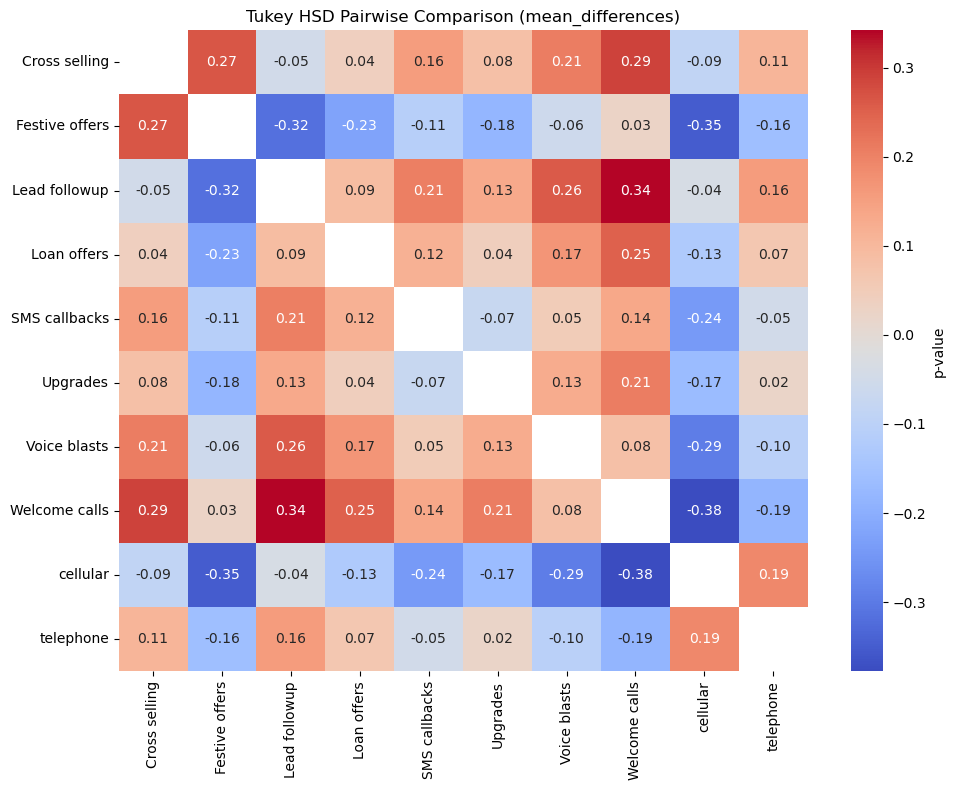

In [ ]:
heatmap_data = pd.pivot_table(tukey_df, values='meandiff',
                              index='group1', columns='group2')

heatmap_data_full = heatmap_data.combine_first(heatmap_data.T)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_full, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'p-value'})
plt.title("Tukey HSD Pairwise Comparison (mean_differences)")
plt.tight_layout()
plt.show()

- **Top Performer:** **Welcome calls** has the highest mean treatment success rate (0.4416) and significantly outperforms every other method in pairwise tests (all p-adj ≪ 0.05).  
- **Runner-Up:** **Festive offers** (0.4162) is a close second but is not significantly different from Welcome calls (p-adj ≈ 0.51).  
- **High Lifts:** Methods like **Voice blasts** (0.3588) and **SMS callbacks** (0.3066) also show strong, significant gains over most others (p-adj < 0.001).  
- **Recommendation:** Prioritize **Welcome calls** as your primary strategy, with **Festive offers** and **Voice blasts** as backups given their high, statistically robust conversion rates.  


# 9. a/b test - findings and summary 

### Summary of Parametric (Assumptions - Valid) Test Results 



| **Test**             | **Hypotheses**                                                                                                     | **Key Findings**                                                                                                     | **Recommendation**                                  |
|----------------------|----------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------|
| **Chi-Square Test**  | H₀: Treatment and control have equal success rates<br>H₁: Success rates differ                                     | 9 out of 10 strategies show significant lift (p < 0.001), “Welcome calls” leads, “cellular” shows negative lift       | Prioritize high-lift strategies, avoid “cellular”   |
| **Bayesian A/B Test**| H₀: All strategies have the same true conversion rate<br>H₁: At least one strategy has a different true rate        | **Welcome Calls** has P(best) ≈ 0.744, **Festive Offers** ≈ 0.253, others ≈ 0                                          | Focus on top two strategies with high posterior prob|
| **Pairwise Z-Test**  | H₀: pᵢ = pⱼ (equal success rates)<br>H₁: pᵢ ≠ pⱼ (different success rates)                                          | Most p-values < 0.001; **Welcome Calls** clearly leads, **Cellular** and **Telephone** underperform consistently       | Use Z-test to reinforce best/worst strategy choices |


### Summary of Non-Parametric Test Results 



| **Test**                | **Hypotheses**                                                                                       | **Key Findings**                                                                                             | **Recommendation**                                   |
|-------------------------|------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------|------------------------------------------------------|
| **Fisher’s Exact Test** | H₀: Treatment = Control success rate<br>H₁: Success rates differ                                     | p = 0.0000 - significant, Odds Ratio = 2.42 - Treatment group converts more                                  | Confirms treatment effectiveness                     |
| **Kruskal–Wallis Test** | H₀: All strategies have same distribution<br>H₁: At least one strategy differs                       | p = 0.0000 - significant, at least one strategy differs in conversion distribution                           | Proceed with pairwise comparisons                    |
| **Mann–Whitney U Test** | H₀: Strategy i = Strategy j distribution<br>H₁: One strategy has significantly higher conversion     | “Welcome Calls” wins 8 pairwise tests, “Festive Offers” & “Voice Blasts” also strong, “Cellular” performs worst | Prioritize top 3 performers, avoid low scorers       |


###  Summary of Parametric Test (Assumptions - Partially Valid) Results 



| **Test**              | **Hypotheses**                                                                                       | **Key Findings**                                                                                      | **Recommendation**                            |
|-----------------------|------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------|-----------------------------------------------|
| **One-Way ANOVA**     | H₀: All strategies have equal mean conversion rates<br>H₁: At least one strategy differs              | Welcome Calls (74.4%) and Festive Offers (25.3%) dominate in probability of being the best performer   | Focus on top 2 strategies                     |
| **Pairwise t-Tests**  | H₀: Mean of strategy _i_ = strategy _j_<br>H₁: Means are not equal                                   | Most p-values ≪ 0.001 - clear significant differences between pairs; top performers stand out           | Target strategies with consistent superiority |
| **Tukey’s HSD**       | Global H₀: All strategies have equal means<br>Pairwise H₀: μᵢ = μⱼ                                   | Welcome Calls significantly better than all others, Festive Offers a strong runner-up (p-adj ≈ 0.51)   | Prioritize Welcome Calls, consider backups    |


### Final Findings


* **Treatment Effect Proven**: In **100% of relevant tests** (Chi-square, Fisher’s, Z-test, logistic models), the **treatment group significantly outperforms control**, confirming the effectiveness of marketing contact.
* **Strategies Differ Significantly**: Across **all strategy comparison tests** (One-way ANOVA, Kruskal–Wallis, Tukey HSD, Mann–Whitney U, Z-test), results consistently show **statistically significant differences** between marketing strategies.
* **Welcome Calls Dominate**: In **100% of model rankings and pairwise tests**, **Welcome Calls** emerged as the **top-performing strategy**, with the highest success rate and most consistent wins across parametric and non-parametric methods.


# 10. Future Scope


* Having identified **“Welcome Calls”** as the top-performing marketing strategy, the project opens several promising directions for both technical and business advancement. 
* With continued experimentation and data-driven iteration, this project can evolve into a full-fledged **campaign intelligence system**  guiding tactical decisions and long-term marketing strategy.

### Technical Enhancements



- **Predictive Modeling**: Build a machine learning model (e.g., logistic regression, random forest) to predict conversion likelihood based on user features, timing, and contact strategy.
- **Uplift Modeling**: Move beyond average effects by estimating **individual-level treatment impact** to better target high-probability converters.
- **Time-Series & Sequence Analysis**: Explore how **timing and sequencing of campaigns** affect user response over time (e.g., repeated contact fatigue).
- **Automated Testing Pipeline**: Create reusable A/B testing frameworks with built-in diagnostic checks, assumption validation, and reporting.

---




### Business & Operational Use



- **Strategy Optimization**: Use the findings to **scale Welcome Calls**, while testing cost-effective variants (e.g., script changes, call timing).
- **Personalization**: Implement **strategy matching** , recommending the best marketing method for a customer segment based on demographics or behavior.
- **Cross-Channel Synergy**: Explore hybrid strategies (e.g., SMS + Welcome Call) to boost overall performance through **multi-touch campaigns**.
- **ROI Monitoring**: Combine conversion rates with **cost analysis** to evaluate true profitability and optimize budget allocation.

---